# More Circuit Identities

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

量子コンピュータをプログラミングする時、私たちの目標は常に、基本的なビルディングブロックから有用な量子回路を構築することです。ただし、必要な基本的構成要素が全て揃っていない場合もあります。このセクションでは、基本的なゲートを相互に変換する方法と、ゲートを使用して少し複雑な(ただしかなり基本的な)ゲートを構築する方法について説明します。

このセクションで説明する手法の多くは、1995年にBarencoと共著者による論文で最初に提案されたものです。

## 1. Making a Controlled-Z from a CNOT

controlled-Zまたはczゲートも、よく使用される2qubitゲートnの1つです。CNOTがXをターゲットqubitに適用するのと同じように、そのコントロールqubitが|1>の状態にある時、controlled-zはZをqubitに適用します。

Qiskitでは、直接呼び出すことができます。

In [2]:
# a controlled-Z
qc.cz(c,t)
qc.draw()

q_0: ─■─
      │ 
q_1: ─■─

ここでの、cとtはコントロールqubitとターゲットqubitです。ただし、IBMQデバイスでは、直接適用できる2qubitゲートはCNOTのみです。従って、CNOTをczに変換する必要があります。

このプロセスは非常に簡単です。アダマールゲートが|0>、|1>を|+>、|->に変換することは既に学びましたよね？

|+>及び|->に対するZゲートの効果は、|0>、|1>に対するXの効果と同じであることもわかっています。この推論から、または単純に行列を乗算することから、以下のことがわかると思います。

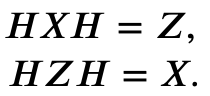

同じトリックを使って、CNOTをcntrolled-Zに変換することができます。

私たちがすべきことは、ターゲットqubitに対するアダマールゲートをCNOTの前と後にすることだけです。これにより、そのqubitに適用された全てのXがZに変換されます。

In [3]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

q_0: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

より一般的には、単一のCNOTを正しい回転で単純に前後に移動することにより、角度πだけブロッホ球の周りの任意の回転の制御されたバージョンに変換できます。

例えば、controlled-Yなら、次の通りです。

In [4]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

q_0: ─────────■───────
     ┌─────┐┌─┴─┐┌───┐
q_1: ┤ SDG ├┤ X ├┤ S ├
     └─────┘└───┘└───┘

controlled-Hも。

## Swapping Qubits

In [5]:
a = 0
b = 1

量子コンピュータで情報を移動させる必要があるとします。一部のqubit実装では、これは物理的に移動することで実行できます。その他の方法としては、2つのqubit間で状態を移動することです。これはSWAPゲートによって行うことができます。

In [6]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

上記のコマンドはこのゲートを直接呼び出していますが、標準のゲートセットを使用して、作成する方法を見てみましょう。

そのために、いくつかの例を見ていきましょう。

まず、qubit aが|1>、qubit bが|0>の状態である場合を見てみましょう。

これには、次のゲートを適用します。

In [7]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

これは、qubit bを|1>に、qubit aを|0>にする効果があります。少なくともこの場合には、SWAPが実行できました。

次に、この状態から、もう一度SWAPして元の状態に戻します。想像通り、上記のプロセスの逆でこれを行うことができます。

In [8]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

┌───┐┌───┐     
q_0: ──■──┤ X ├┤ X ├──■──
     ┌─┴─┐└─┬─┘└─┬─┘┌─┴─┐
q_1: ┤ X ├──■────■──┤ X ├
     └───┘          └───┘

これらの2つのプロセスでは、一方の最初のゲートが他方の初期状態に影響を与えないことに注意して下さい。例えば|1>のbをaにswapする時、最初のゲートはcx(b, a)です。最初にbが|1>でない時は、影響はありません。

また、一方の最終ゲートが他方の最終状態に影響を与えないことにも注意してください。例えば、|1>をaからbにswapする時に、必要な最後のcx(b,a)は|1>がbにない時には作用しません。

これらの観察結果をもとに、一方のゲートからもう一方のゲートに無効なゲートを追加することで、2つのプロセスを組み合わせることができます。例えば、

In [9]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

これは、aからbに|1>をswapするプロセスと考えることができます。最初に、無駄にqc.cx(b,a)を使用します。また、これをaの|1>をbからaにswapするプロセスと考えることもできますが、最後に無用なqc.cx(b,a)を使用します。いずれにせよ、結果は両方の方法でswapを実行できるプロセスです。

また、|00>状態に対しても正しい効果を発揮します。これは対称的であるため、状態を入れ替えても効果はありません。制御qubitが|0>の時、CNOTゲートは効果がないため、プロセスは正しく何もしません。

|11>も対称的であるため、最初のCNOTは2番目のゲートに影響を与えず、3番目のゲートは最初のゲートを元に戻します。従って、全体の効果は取るに足らないものになります。

このようにして、SWAPゲートを単一のqubitローテーションとCNOTゲートの標準ゲートセットに分解できました！

In [10]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

|00>、|01>、|10>、|11>全ての状態で機能し、計算ベースで全ての機能で機能するためには、一般的に全ての状態で機能する必要があります。従って、この回路は全ての可能な2qubitをswapします。

CNOTゲートの順序を変更した場合も、同じ効果が得られます。

In [11]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

これは、前述の回路同様、SWAPゲートを取得するための有効な方法です。

ここで使用された導出はz基底状態に基づいていましたが、|+>と|->のqubitをswapするために何が必要かを考えることによって行うこともできます。SWAPゲートを実装する結果の方法は、ここでの方法と完全に同等です。

## 3. Controlled Rotations

単一のCNONTゲートからcontrolled-π回転を構築する方法については、既に説明しました。次に、controlled rotationを構築する方法を見ていきます。

まず、y軸を中心とした任意の回転を考えてみましょう。具体的には、次の一連のゲートを考えてみてください。

In [12]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

q_0: ──────────────■─────────────────■──
     ┌──────────┐┌─┴─┐┌───────────┐┌─┴─┐
q_1: ┤ RY(pi/2) ├┤ X ├┤ RY(-pi/2) ├┤ X ├
     └──────────┘└───┘└───────────┘└───┘

コントロールqubitが|0>の時、ここにあるのはRy(θ/2)の直後にそのインバースRy(-θ/2)が続くだけです。最終的な結果も取るに足らないものです。ただし、コントロールqubitの状態が|1>の場合、Ry(θ/2)の前と後にXゲートが効果的に続くことになります。これは、y回転の方向を反転し、2番目のRy(θ/2)を作成する効果があります。従って、この場合の正味の結果は、回転Ry(θ)の制御されたバージョンを作成することです。

この方法が機能するのは、x軸とy軸が直交し、xゲートが回転の方向を反転させたためです。従って、制御されたRz(θ)を作成することになります。制御されたRx(θ)はCNOTゲートを使用して同様に作成できます。

また、任意の制御された回転Uの単一qubitを作成することもできます。これを行うmには、3つの回転A、B、Cと次のような位相aを見つけるだけです。

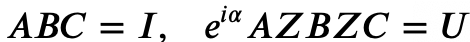

次に、controlled-Zゲートを使用して、これらの最初の関係を、最初のコントロールqubitが|0>になるたびに発生させ、2つ目のコントロールqubitが|1>の時に発生させます。Rz(2α)回転は、正しい位相を得るためにコントロールqubitでも使用されます。これは、重ね合わせ状態がある時、非常に重要です。

In [13]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

In [14]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.u1(alpha,c)
qc.draw()

┌───────┐
q_0: ──────■───────■─┤ U1(1) ├
     ┌───┐ │ ┌───┐ │ └─┬───┬─┘
q_1: ┤ C ├─■─┤ B ├─■───┤ A ├──
     └───┘   └───┘     └───┘

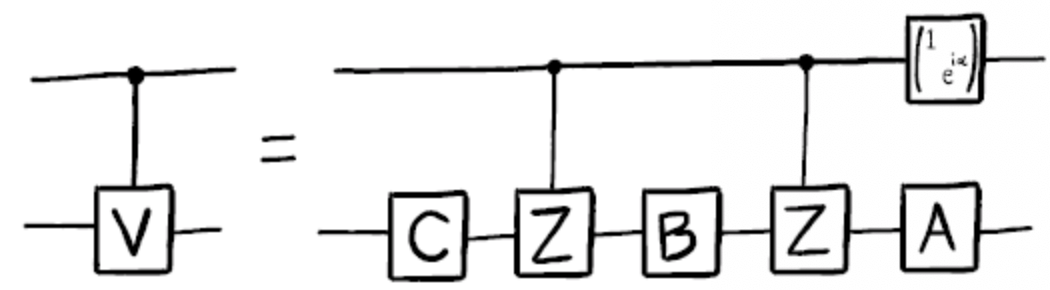

## 4. The Toffoli

Toffoliゲートは、2つのコントロールqubitと1つのターゲットqubitを持つ3qubitゲートです。両方のコントロールが|1>の場合にのみ、ターゲットでXを実行します。ターゲットの最終的な状態は、その初期状態が|0>と|1>のどちらであったかに応じて、2つのコントロールのANDまたはNANDのいずれかに等しくなります。Toffoliはcontrolled-controlled-NOTと考えることができ、CCXとも呼ばれています。

In [15]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

1qubitゲートと2qubitのゲートからこれを構築する方法を確認するには、まず、より一般的なものを構築することを考えてみましょう。

これは、任意の1qubit回転Uに対する任意のcontrolled-controlled-Uです。これには、V = √UとV†の制御されたバージョンを定義する必要があります。以下のコードでは、未定義のサブルーチンcvとcvdgの代わりに、それぞれcu(θ,c,t)とcu1(-θ,c,t)を使用します。コントロールはaとbで、ターゲットはtです。

In [16]:
qc = QuantumCircuit(3)
qc.cu1(theta,b,t)
qc.cx(a,b)
qc.cu1(-theta,b,t)
qc.cx(a,b)
qc.cu1(theta,a,t)
qc.draw()

q_0: ───────■──────────■───■───
          ┌─┴─┐      ┌─┴─┐ │   
q_1: ─■───┤ X ├─■────┤ X ├─┼───
      │pi └───┘ │-pi └───┘ │pi 
q_2: ─■─────────■──────────■───

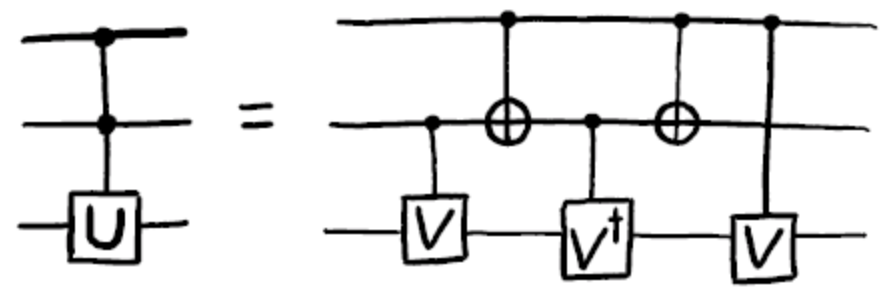

コントロールqubitの各値を追跡することで、両方のコントロールが1の場合にのみ、Uゲートがターゲットqubitに適用されていることを確認できます。

これまでに説明したアイディアを使用して、各制御Vゲートを実装できます。二重に制御されたUゲートのある海路に到着します。Toffoliゲートを実装するために必要なCNOTゲートの最小数が6であることがわかります。

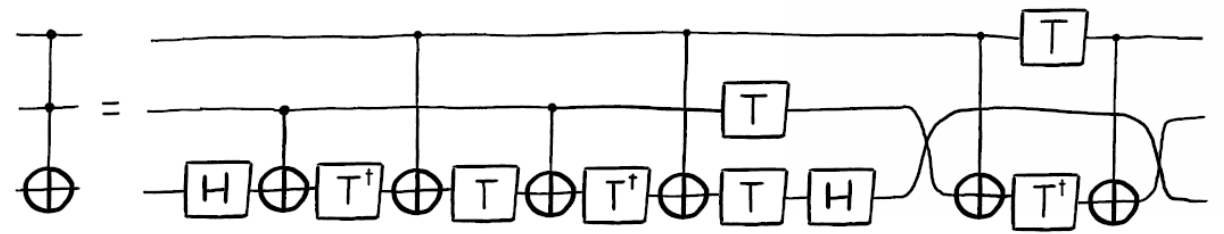

Toffoliは、量子コンピューティングでANDゲートを実行するためのユニークな方法ではありません。同じ効果を持ちますが、相対位相も導入する他のゲートを定義することもできます。これらの場合、より少ないCNOTでゲートを実装できます。

例えば、制御されたアダマールゲートと制御されたZゲートの両方を使用するとします。どちらも単一のCNOTで実装できます。これらを使用して、次の回路を作成することができます。

In [17]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

q_0: ──■───────■──
       │       │  
q_1: ──┼───■───┼──
     ┌─┴─┐ │ ┌─┴─┐
q_2: ┤ H ├─■─┤ H ├
     └───┘   └───┘

2つのコントロールが|00>の場合、これはターゲットに対して何も行いません。|11>の場合、ターゲットの前にHが続くZゲートが発生します。正味の効果は、ターゲットに対するZです。|01>と|10>の状態の場合、ターゲットは2つのアダマール(相互に打ち消し合う)だけ、またはZ(相対位相のみを誘導する)を経験します。これは、ターゲットの値がコントロールの|11>でのみ変更されるためです。ただし、これは、3つのCNOTと同等のもので行われます。

## 5. Arbitrary rotations from H and T

現在のデバイスのqubitはノイズの影響を受けやすく、基本的には誤って行われたゲートで構成されています。温度、漂遊磁場、隣接するqubitでの活動などの単純なことは、私たちが意図していないことを引き起こす可能性があります。

量子コンピュータの大規模なアプリケーションでは、このノイズからqubitを保護する方法でqubitをエンコードする必要があります。これは、ゲートを誤って実行することを遥かに困難にするか、わずかに間違った方法で実装することによって行われます。

これは、1qubitの回転Rx(θ)、Ry(θ)、Rz(θ)にとって非常に不都合です。あなたがθ + 0.0000001のようなものを誤って実装しないことと同じように、完全な精度で角度θを与えることは不可能です。達成できる精度には常に限界があり、大規模な回路での欠陥の蓄積を考慮すると、許容範囲よりも常に大きくなってしまいます。従って、これらの回転をフォールトトレラントな量子コンピュータに直接実装することはできませんが、その代わりに、より慎重に回転を構築することはできます。

フォールトトレラントスキームは、通常、HとTの2つのゲートの複数のアプリケーションを使用して、これらのローテーションを実行します。

Tゲートは、Qiskitでは".t()"と表されます。

In [18]:
qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw()

┌───┐
q_0: ┤ T ├
     └───┘

これはZ軸を中心としたθ = π/4の回転なので、数学的には次のように表されます。

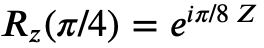

以下では、HゲートとTゲートが完全に効果的であると仮定します。これは、エラー訂正とフォールトトレランスに適した方法で設計できます。

アダマールと前の章で説明した方法を使用すると、Tゲートを使用して、X軸を中心に同様の回転を作成できます。

In [19]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├
     └───┘└───┘└───┘

では、2つを組み合わせて、ゲート Rz(π/4)とRx(π/4)を作ってみましょう。

In [20]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

┌───┐┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├┤ T ├
     └───┘└───┘└───┘└───┘

これは1qubitゲートであるため、ブロッホ球の周りの回転と考えることができます。つまり、ある軸を中心としたある角度の回転です。ここでは、軸について考えすぎる必要はありませんが、単にx,y,zになることはありません。より重要なのは角度です。

この回転の角度の重要な特性は、それが不合理であることです。あなたはたくさんの数学を使ってこれを自分で証明することができるかもしれませんが、ゲートを適用することによって、動作中の非合理性を確認することもできます。n回繰り返すと同じ軸を中心に異なる角度で回転します。非合理性により、異なる繰り返しから生じる角度は同じになることはありません。

これを有利に利用できます。各角度は、0〜2πの間のどこかにあります。この感覚を幅2π/nのnスライスに分割してみましょう。繰り返しごとに、結果の角度はこれらのスライスの1つに含まれます。最初のn+1回の繰り返しの角度を見ると、少なくとも1つのスライスにこれらの角度が2つ含まれていることは確実です。n1を使用して最初の繰り返しに必要な繰り返し数を示し、n2を2番目の繰り返しを示します。

これにより、n2-n1反復の角度について何かを証明できます。これは実質的にn2回の繰り返しと同じであり、その後にn1回の繰り返しの逆が続きます。これらの角度は等しくない(非合理性のため)だけでなく、2π/n以下の差(同じスライスに対応するため)であるため、n2-n1反復の角度は、

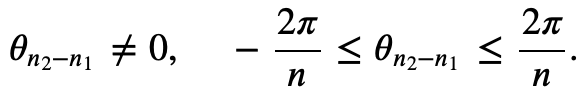

従って、小さな角度で回転させることができます。これを使用して、このゲートを繰り返す回数を増やすだけで小さい角度で回転できます。

小角回転を多用することで、好きな角度で回転させることもできます。これは常に正確であるとは限りませんが、最大2π/nまで正確であることが保証されています。これは、好きなだけ小さくすることができます。これで、ローテーションの不正確さを管理できるようになりました。

これまでのところ、私たちはこれらの任意の回転を1つの軸を中心に行うことしかできません。2番目の軸については、Rz(π/4)とRx(π/4)の回転を逆の順序で行うだけです。

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

┌───┐┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├┤ T ├
     └───┘└───┘└───┘└───┘

この回転に対応する軸は、以前に検討したゲートの軸と同じではありません。従って、2つの軸を中心とした任意の回転が得られます。これを使用して、ブロッホ球を中心とした任意の回転を生成できます。Tゲートのコストがかなりかかりますが、全てを実行できるようになりました。

Tゲートが量子計算で非常に卓越しているのは、このようなアプリケーションのためです。実際、フォールトトレラントな量子コンピュータのアルゴリズムの複雑さは、Tゲートがいくつ必要かという点でしばしば引用されます。これはできるだけ少ないTゲートで、物事を達成するための探究の動機になります。

上記の説明は、Tゲートがこのように使用できることを証明するためのものであり、私たちが知っている最も効率的な方法を表すものではないことに注意してください。